# MULTILABEL CLASSIFICATION

# Demo


## Problem Statement
**Description :** Multilabel Classification

**Learnings :** Create basic Sequential Model
              + train from scratch

**Demo :** Classify created dataset into more than 1 categories- AbdomenCT, BreastMRI, ChestCT, Abnormal

      Input:- Xray Image

      Output:- array with 4 values

**Dataset :** Dataset Created from Ex1 & Ex2
           link - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
            https://www.kaggle.com/andrewmvd/medical-mnist


# House Keeping


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# IMPORT LIBRARIES
# IMPORT LIBRARIES
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

root_path = '/content/gdrive/MyDrive/Colab Notebooks/Rising_2021'
os.chdir(root_path)
cwd_path = os.getcwd()

# DEFINE TRAIN-VAL-TEST DATA DIRECTORIES
input_path = os.path.join(root_path, "datasets", "multilabel_dataset")
train_path = os.path.join(input_path, "train")
val_path = os.path.join(input_path, "val")
test_path = os.path.join(input_path, "test")

print(train_path)
print(val_path)
print(test_path)
print(root_path)



/content/gdrive/MyDrive/Colab Notebooks/Rising_2021/datasets/multilabel_dataset/train
/content/gdrive/MyDrive/Colab Notebooks/Rising_2021/datasets/multilabel_dataset/val
/content/gdrive/MyDrive/Colab Notebooks/Rising_2021/datasets/multilabel_dataset/test
/content/gdrive/MyDrive/Colab Notebooks/Rising_2021


In [ ]:
# DEFINE PARAMETERS
BATCH_SIZE = 16
IMG_HEIGHT = 128
IMG_WIDTH = 128
NEPOCHS = 8
NLABELS = 4


# Data Processing


In [ ]:
# PREPARE TRAIN TEST VAL DATA
train = pd.read_csv(os.path.join(train_path, 'train_labels.csv'))
test = pd.read_csv(os.path.join(test_path, 'test_labels.csv'))
val = pd.read_csv(os.path.join(val_path, 'val_labels.csv'))

train_image = []
for i in tqdm(range(train.shape[0])):
  img = image.load_img(os.path.join(train_path, train['Image'][i]), target_size=(IMG_WIDTH, IMG_HEIGHT, 3))
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
train_X = np.array(train_image)
train_Y = np.array(train.drop(['Image'], axis=1))
print("Train Samples- Input shape:", train_X.shape, "Labels shape:", train_Y.shape)

test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img(os.path.join(test_path, test['Image'][i]), target_size=(IMG_WIDTH, IMG_HEIGHT, 3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test_X = np.array(test_image)
test_Y = np.array(test.drop(['Image'], axis=1))
print("Test Samples- Input shape:", test_X.shape, "Labels shape:", test_Y.shape)

val_image = []
for i in tqdm(range(val.shape[0])):
    img = image.load_img(os.path.join(val_path, val['Image'][i]), target_size=(IMG_WIDTH, IMG_HEIGHT, 3))
    img = image.img_to_array(img)
    img = img/255
    val_image.append(img)
val_X = np.array(val_image)
val_Y = np.array(val.drop(['Image'], axis=1))
print("Val Samples- Input shape:", val_X.shape, "Labels shape:", val_Y.shape)

  0%|          | 0/60 [00:00<?, ?it/s]

Train Samples- Input shape: (300, 128, 128, 3) Labels shape: (300, 4)


  0%|          | 0/36 [00:00<?, ?it/s]

Test Samples- Input shape: (60, 128, 128, 3) Labels shape: (60, 4)


100%|██████████| 36/36 [00:09<00:00,  3.87it/s]

Val Samples- Input shape: (36, 128, 128, 3) Labels shape: (36, 4)


# Implement Model


In [ ]:
# DEFINE MODEL
def get_model():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(NLABELS, activation='sigmoid'))
    return model

model = get_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Train Model

In [ ]:
H = model.fit(train_X, train_Y, epochs=NEPOCHS, validation_data=(val_X, val_Y),
              batch_size=BATCH_SIZE)



Epoch 1/8
19/19 [==============================] - 9s 427ms/step - loss: 0.5459 - accuracy: 0.5570 - val_loss: 0.3969 - val_accuracy: 0.7222
Epoch 2/8
19/19 [==============================] - 8s 402ms/step - loss: 0.3345 - accuracy: 0.8610 - val_loss: 0.2769 - val_accuracy: 0.7222
Epoch 3/8
19/19 [==============================] - 7s 382ms/step - loss: 0.2046 - accuracy: 0.8997 - val_loss: 0.1338 - val_accuracy: 1.0000
Epoch 4/8
19/19 [==============================] - 7s 380ms/step - loss: 0.1724 - accuracy: 0.9776 - val_loss: 0.0918 - val_accuracy: 1.0000
Epoch 5/8
19/19 [==============================] - 7s 377ms/step - loss: 0.0868 - accuracy: 0.9972 - val_loss: 0.0610 - val_accuracy: 1.0000
Epoch 6/8
19/19 [==============================] - 8s 398ms/step - loss: 0.0703 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 1.0000
Epoch 7/8
19/19 [==============================] - 7s 388ms/step - loss: 0.0608 - accuracy: 0.9935 - val_loss: 0.0878 - val_accuracy: 1.0000
Epoch 8/8
19/

## Training Plots


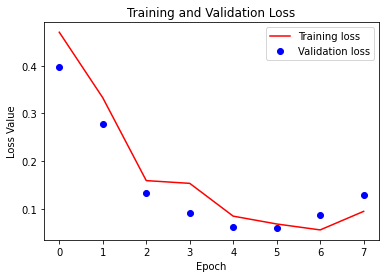

In [ ]:
########################

# PLOT TRAINING LOSS
loss = H.history['loss']
val_loss = H.history['val_loss']

plt.figure()
plt.plot(H.epoch, loss, 'r', label='Training loss')
plt.plot(H.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()



## Evaluate Model


In [ ]:
### Test Set Predictions
print("Predictions...")
labels = list(test.columns)
labels = labels[1:]
print("Labels:", labels)
n = 6
for i in range(0, n):
    test_img = test_X[i * 10]
    test_gt_label = test_Y[i * 10]
    gt = []
    for lidx, label_id in enumerate(test_gt_label):
        if test_gt_label[lidx] == 1:
            gt.append(labels[lidx])

    prob = model.predict(test_img.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3))
    result = prob[0]

    print("\n--------Result:")
    print("GT:", gt)
    pred_labs = []
    for lidx, pb in enumerate(result):
        if pb >= 0.5:
            pred_labs.append(labels[lidx])
    print("Predicted labels:", pred_labs)
    for i in range(NLABELS):
        print("{}".format(labels[i])+" ({:.3})".format(prob[0, i]))
    # plt.imshow(test_img)
    # plt.axis("off")
    # str_title = "GT:" + str(gt) + " Predicted:" + str(prediction)
    # plt.suptitle(str_title)
    # plt.show()

Predictions...
Labels: ['AbdomenCT', 'BreastMRI', 'ChestCT', 'Abnormal']

--------Result:
GT: ['AbdomenCT']
Predicted labels: ['AbdomenCT']
AbdomenCT (0.912)
BreastMRI (0.0269)
ChestCT (0.0118)
Abnormal (0.29)

--------Result:
GT: ['BreastMRI']
Predicted labels: ['BreastMRI']
AbdomenCT (0.000141)
BreastMRI (0.999)
ChestCT (4.31e-10)
Abnormal (1.47e-05)

--------Result:
GT: ['ChestCT']
Predicted labels: ['ChestCT', 'Abnormal']
AbdomenCT (0.0138)
BreastMRI (0.0029)
ChestCT (0.988)
Abnormal (0.524)

--------Result:
GT: ['ChestCT']
Predicted labels: ['ChestCT', 'Abnormal']
AbdomenCT (0.0146)
BreastMRI (0.00242)
ChestCT (0.983)
Abnormal (0.645)

--------Result:
GT: ['ChestCT', 'Abnormal']
Predicted labels: ['ChestCT', 'Abnormal']
AbdomenCT (0.0331)
BreastMRI (0.00733)
ChestCT (0.963)
Abnormal (0.681)

--------Result:
GT: ['ChestCT', 'Abnormal']
Predicted labels: ['ChestCT', 'Abnormal']
AbdomenCT (0.0195)
BreastMRI (0.00499)
ChestCT (0.973)
Abnormal (0.667)
